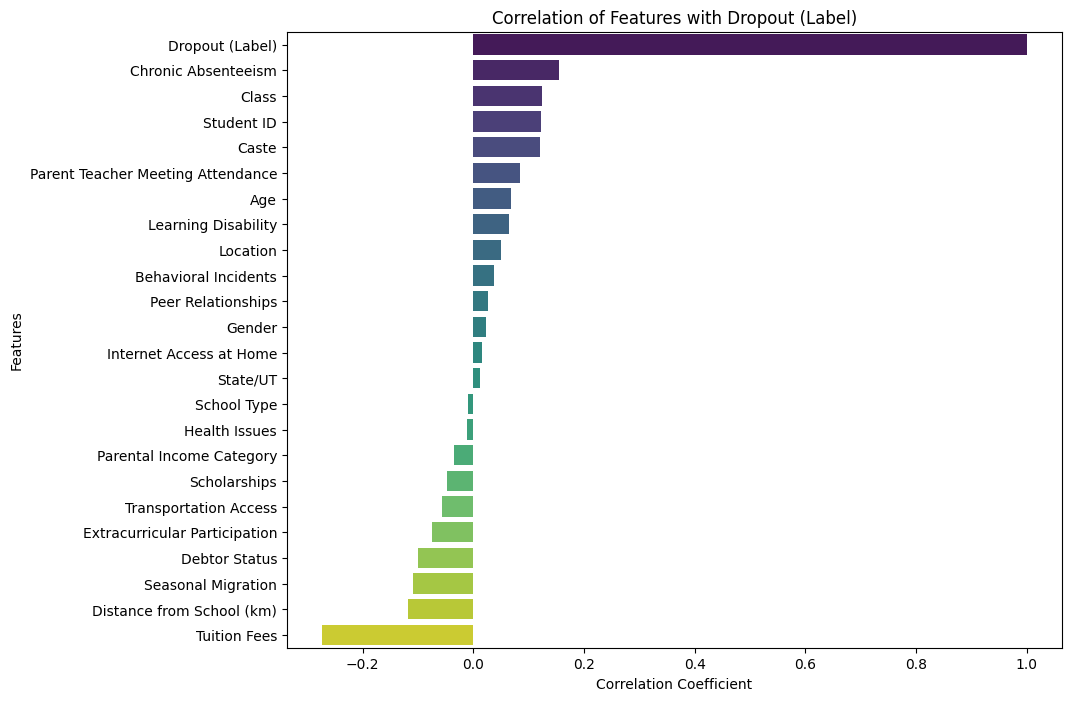

Dropout (Label)                      1.000000
Chronic Absenteeism                  0.155483
Class                                0.123705
Student ID                           0.122467
Caste                                0.121195
Parent Teacher Meeting Attendance    0.083481
Age                                  0.067695
Learning Disability                  0.063862
Location                             0.050750
Behavioral Incidents                 0.036573
Peer Relationships                   0.027046
Gender                               0.023138
Internet Access at Home              0.014921
State/UT                             0.012222
School Type                         -0.009428
Health Issues                       -0.011901
Parental Income Category            -0.035530
Scholarships                        -0.047693
Transportation Access               -0.056400
Extracurricular Participation       -0.074794
Debtor Status                       -0.100294
Seasonal Migration                

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/kaggle/input/refined-student-data/refined-student-data.csv')

# Encode the target variable 'Dropout (Label)' as binary
df['Dropout (Label)'] = df['Dropout (Label)'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encode categorical features using Label Encoding for simplicity
le = LabelEncoder()
categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_features:
    df[col] = le.fit_transform(df[col])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get correlations with the target variable 'Dropout (Label)'
correlation_with_target = correlation_matrix['Dropout (Label)'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 8))
sns.barplot(y=correlation_with_target.index, x=correlation_with_target.values, palette='viridis')
plt.title('Correlation of Features with Dropout (Label)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Show correlation values
correlation_with_target


In [ ]:
df['Dropout (Label)'].value_counts()

In [ ]:
df = df.drop(['Age', 'State/UT', 'Parent Teacher Meeting Attendance', 'Internet Access at Home', 'Debtor Status','Extracurricular Participation'], axis=1)

## Data Splitting

In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'Dropout (Label)' is the target variable and you want an 80/20 split
X = df.drop('Dropout (Label)', axis=1)  # Features
y = df['Dropout (Label)']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust random_state as needed

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (120, 23) (120,)
Testing set shape: (30, 23) (30,)


## Modelling

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'Dropout (Label)' is the target variable
# Handle non-numeric columns (replace this with your actual handling)
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separate features and target
X = df.drop('Dropout (Label)', axis=1)
y = df['Dropout (Label)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f'{name}: {accuracy:.4f}')

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.7000
Random Forest: 0.8333
Gradient Boosting: 0.8333
XGBoost: 0.7333
KNN: 0.8333
SVM: 0.7667
Decision Tree: 0.7000
Naive Bayes: 0.7000


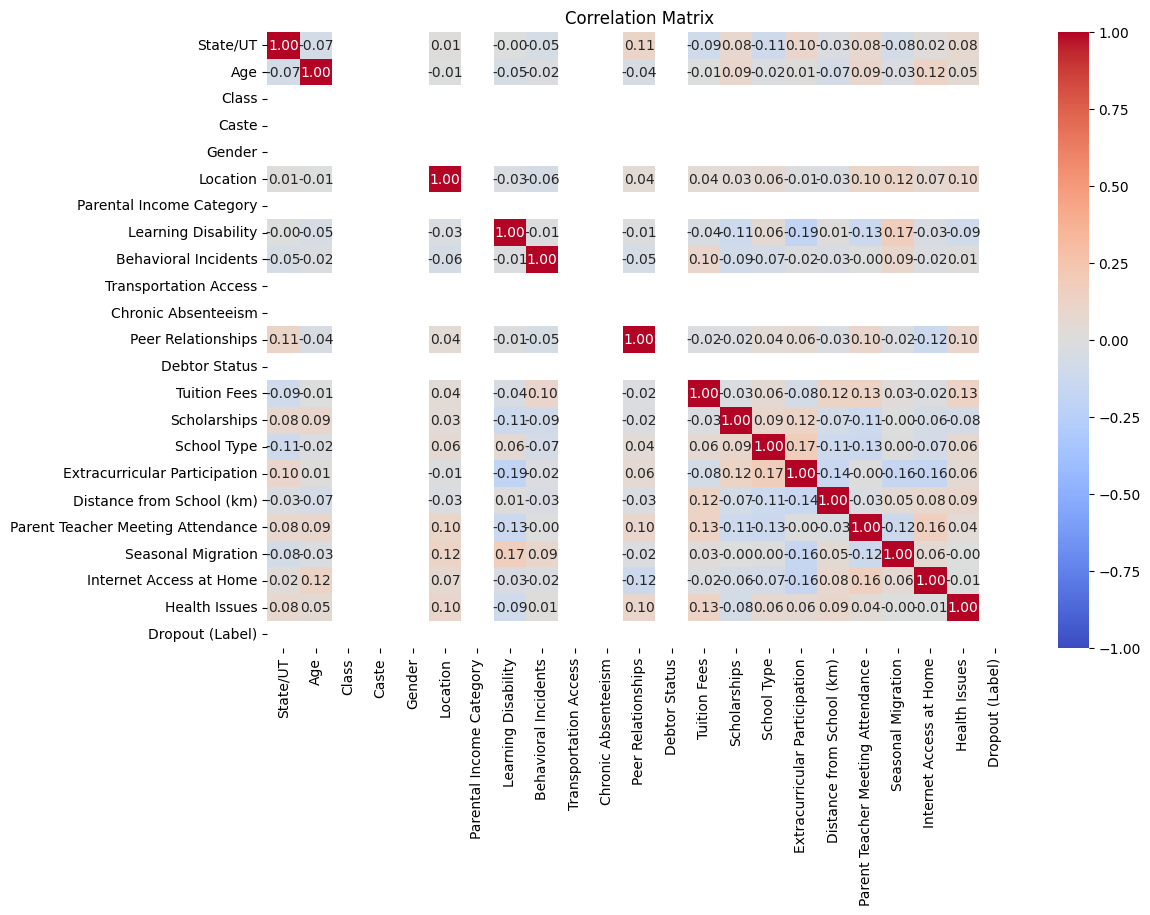

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

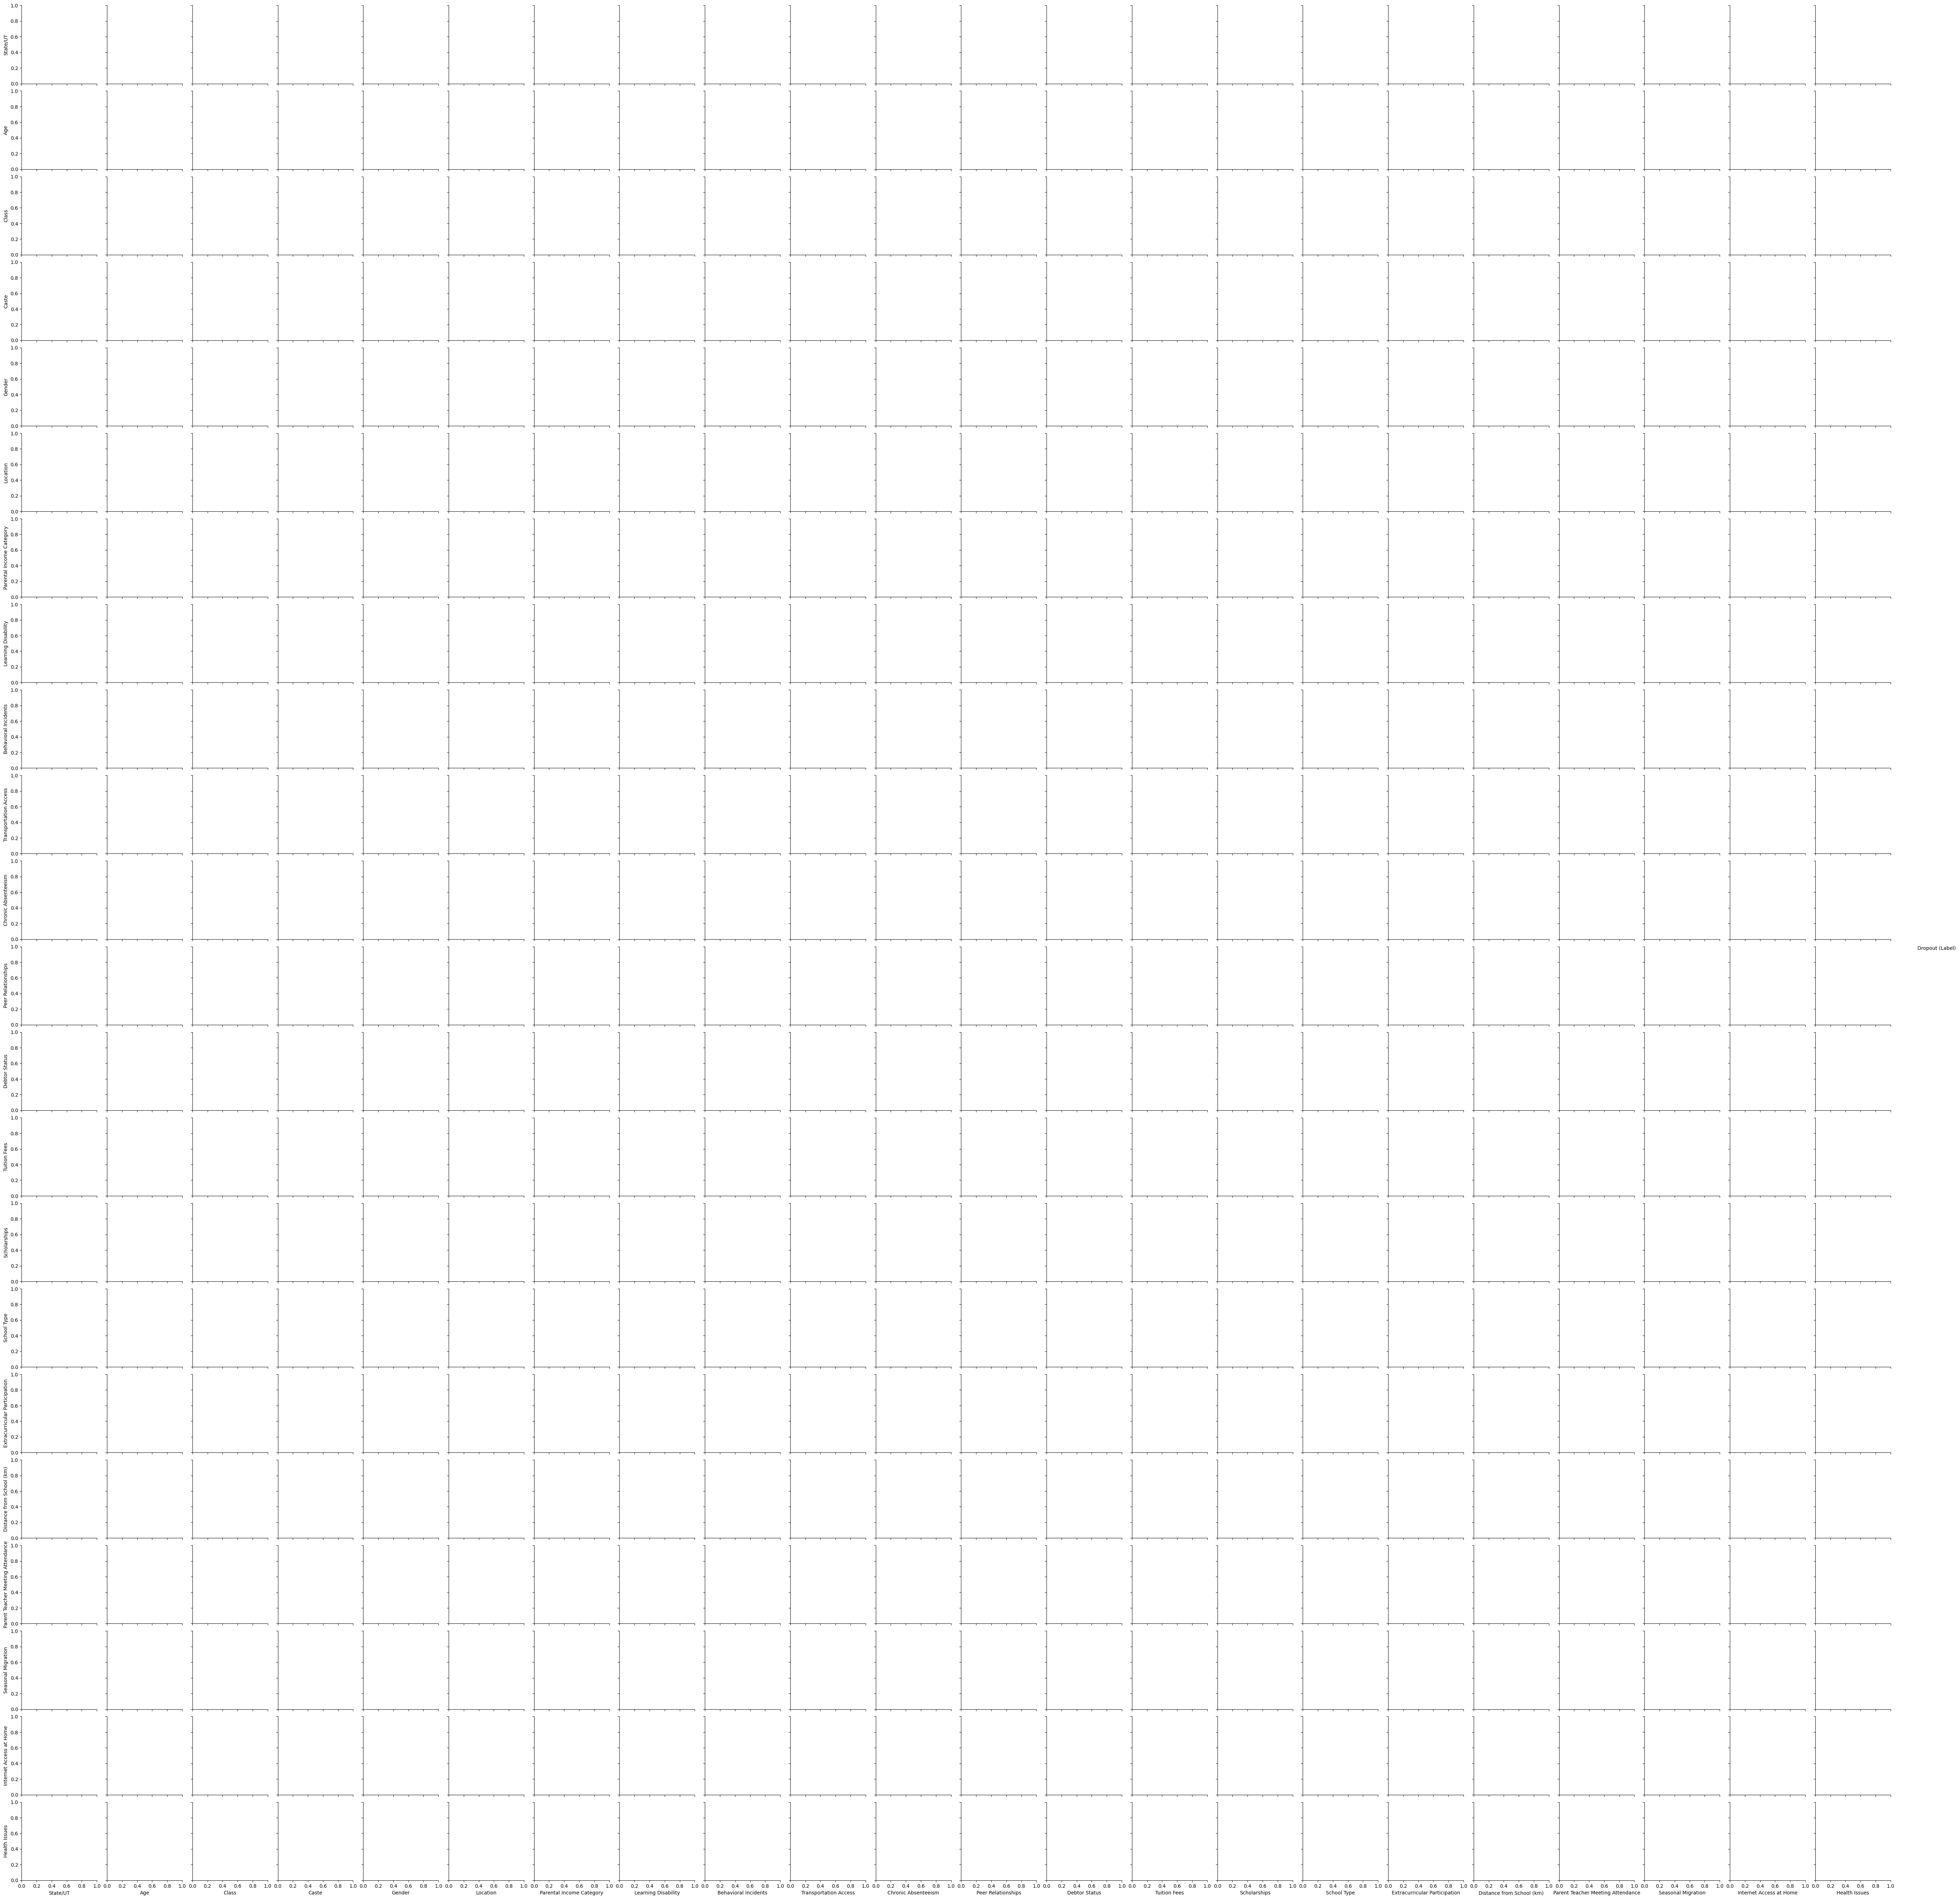

ValueError: min() arg is an empty sequence

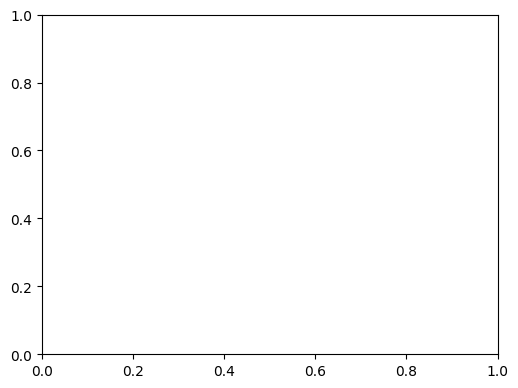

In [11]:
# Convert categorical variables to numeric for correlation analysis
df_numeric = df.copy()

# Mapping categorical variables to numerical values
df_numeric['Gender'] = df_numeric['Gender'].map({'Male': 0, 'Female': 1})
df_numeric['Class'] = df_numeric['Class'].map({'8th': 8, '9th': 9, '10th': 10, '11th': 11, '12th': 12})
df_numeric['Caste'] = df_numeric['Caste'].map({'General': 0, 'OBC': 1, 'SC': 2, 'ST': 3})
df_numeric['Parental Income Category'] = df_numeric['Parental Income Category'].map({'Low': 0, 'Middle': 1, 'High': 2})
df_numeric['Chronic Absenteeism'] = df_numeric['Chronic Absenteeism'].map({'No': 0, 'Yes': 1})
df_numeric['Debtor Status'] = df_numeric['Debtor Status'].map({'No': 0, 'Yes': 1})
df_numeric['Transportation Access'] = df_numeric['Transportation Access'].map({'No': 0, 'Yes': 1})
df_numeric['Dropout (Label)'] = df_numeric['Dropout (Label)'].map({'No': 0, 'Yes': 1})

# Drop the 'Student ID' column as it's not needed for correlation
df_numeric = df_numeric.drop(columns=['Student ID'])

# Correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Pairplot for visualizing relationships between factors and dropout status
sns.pairplot(df_numeric, hue='Dropout (Label)', diag_kind='kde')
plt.show()

# Box plots for each categorical factor vs dropout status
categorical_columns = ['Gender', 'Class', 'Caste', 'Parental Income Category', 'Chronic Absenteeism', 'Debtor Status', 'Transportation Access']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Dropout (Label)', y=df[col], data=df_numeric)
    plt.title(f'{col} vs Dropout (Label)')
plt.tight_layout()
plt.show()

# Violin plots for continuous variables vs dropout status
continuous_columns = ['Tuition Fees', 'Distance from School (km)']

plt.figure(figsize=(15, 7))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(1, 2, i)
    sns.violinplot(x='Dropout (Label)', y=df[col], data=df_numeric)
    plt.title(f'{col} vs Dropout (Label)')
plt.tight_layout()
plt.show()
